In [8]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
import cv2
import json
import matplotlib.patches as patches


In [16]:
src = "/media/ej/eb1186dc-fe0d-4742-9219-5766b227e606/ej/ctw-annotations/train.jsonl"
with open(src, "r+") as f:
    lines = f.readlines()
for line in lines:
    dic = json.loads(line)
    print(dic["annotations"])
    break

[[{'adjusted_bbox': [140.26028096262758, 897.1957001682758, 22.167573140645146, 38.36424196832945], 'attributes': ['distorted', 'raised'], 'is_chinese': True, 'polygon': [[140.26028096262758, 896.7550603352049], [162.42785410327272, 898.0769798344178], [162.42785410327272, 935.7929346470926], [140.26028096262758, 935.0939571156308]], 'text': '明'}, {'adjusted_bbox': [162.42785410327272, 898.5416545674744, 23.376713493771263, 37.74268246537315], 'attributes': ['distorted', 'raised'], 'is_chinese': True, 'polygon': [[162.42785410327272, 898.0769798344178], [185.80456759704398, 899.4710040335876], [185.80456759704398, 936.5300382257251], [162.42785410327272, 935.7929346470926]], 'text': '海'}, {'adjusted_bbox': [185.80456759704398, 899.90363223333, 21.764526356269812, 37.08391855844286], 'attributes': ['distorted', 'raised'], 'is_chinese': True, 'polygon': [[185.80456759704398, 899.4710040335876], [207.5690939533138, 900.7688886328147], [207.5690939533138, 937.2163070747966], [185.804567597

In [19]:
pic_loc = "/media/ej/eb1186dc-fe0d-4742-9219-5766b227e606/ej/ctw/ctw_data/train/"
test_pic = os.path.join(pic_loc,dics["image_id"]+".jpg")
test_pic

'/media/ej/eb1186dc-fe0d-4742-9219-5766b227e606/ej/ctw/ctw_data/train/0000172.jpg'

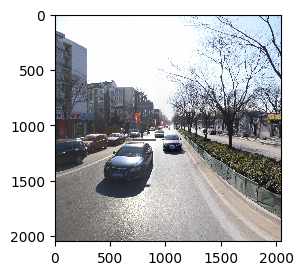

In [33]:
p = cv2.imread(test_pic,cv2.IMREAD_COLOR)
p = cv2.cvtColor(p, cv2.COLOR_BGR2RGB)
fig=plt.figure(figsize=(3, 3), dpi= 100)
plt.imshow(p)

In [58]:
def poly2bbox(poly,image_size):
    x, y = [],[]
    for v in poly:
        x.append(v[0])
        y.append(v[1])
    x = np.sort(np.unique(x))
    y = np.sort(np.unique(y))
    
    x1 = np.min(x)/image_size
    x2 = np.max(x)/image_size
    y1 = np.min(y)/image_size
    y2 = np.max(y)/image_size
    w = x2 - x1
    h = y2 - y1

    return x1,y1,w,h

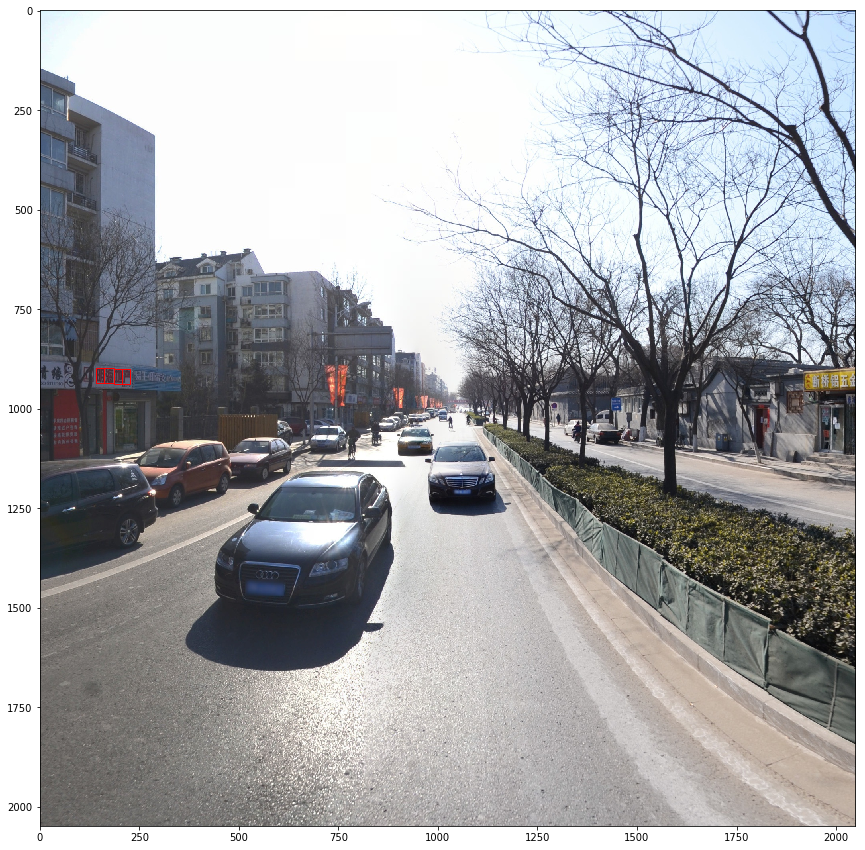

In [62]:
fig,ax = plt.subplots(1,figsize=(15,15))
ax.imshow(p)
for anno in dics["annotations"][0]:
    if not anno["is_chinese"]:
        continue
    else:
        x,y,w,h = poly2bbox(anno["polygon"],2048)
        rect = patches.Rectangle((x*2048,y*2048),w*2048,h*2048,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
plt.show()